In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
main_dir = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/MS_Data/ST002773_Shanghai_LungCancer'
x_rcc_test_file = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/alignment_RCC_2024_Feb_27/April_30_Finetune_Data/X_finetune_test.csv'

x_rcc_test = pd.read_csv(x_rcc_test_file, index_col=0)

In [3]:
main_alignment = pd.read_csv(f'{main_dir}/alignment_df.csv', index_col=0)


In [57]:
metadata = pd.read_csv(f'{main_dir}/metadata_complete.csv', index_col=0)

In [5]:
main_alignment

,623,626,624,625
541,,,,
NaN,NaN,NaN,NaN,NaN
FT10040,FT5342,FT5111,FT5365,FT5313
FT10041,FT5337,NaN,NaN,NaN
FT10068,NaN,FT5134,NaN,FT5355
FT10089,FT5372,FT5131,NaN,FT5336
...,...,...,...,...
FT9914,FT5267,FT5058,FT5303,FT5250
FT9916,FT5276,FT5047,FT5314,FT5249
FT9972,FT5312,FT5090,FT5337,FT5292


In [36]:
def load_raw_data(num, alignment_df):
    peaks_intensity_file = f'{main_dir}/{num}_final_peaks_intensity_max.csv'
    peak_info_file = f'{main_dir}/{num}_final_peaks_peak_info.csv'

    peaks_intensity = pd.read_csv(peaks_intensity_file, index_col=0)
    peak_info = pd.read_csv(peak_info_file, index_col=0)

    selected_peaks = alignment_df[f'{num}'].copy()
    selected_peaks.dropna(inplace=True)
    peak_info = peak_info.loc[selected_peaks.values].copy()
    peaks_intensity = peaks_intensity.loc[selected_peaks.values].copy()
    
    peak_info.index = selected_peaks.index.tolist()
    peaks_intensity.index = selected_peaks.index.tolist()

    peak_info['exists'] = 1
    return peaks_intensity, peak_info

In [37]:
int1, info1 = load_raw_data(623, main_alignment)
int2, info2 = load_raw_data(624, main_alignment)
int3, info3 = load_raw_data(625, main_alignment)
int4, info4 = load_raw_data(626, main_alignment)

In [38]:
combined_info = info1.add(info2, fill_value=0).add(info3, fill_value=0).add(info4, fill_value=0)


<Axes: >

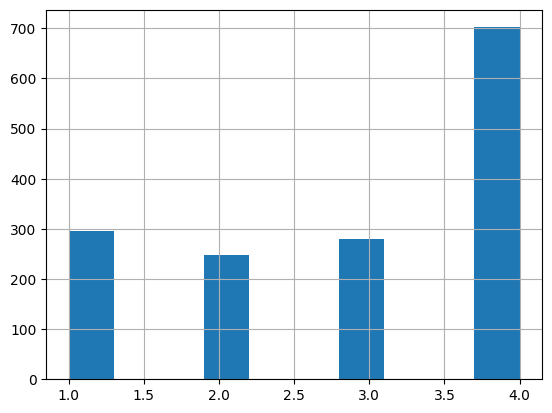

In [39]:
combined_info['exists'].hist()

In [41]:
combined_info = combined_info.divide(combined_info['exists'], axis=0)

In [42]:
combined_info

,mzmed,mzmin,mzmax,rtmed,rtmin,rtmax,auto_corr,cross_corr,freq,chunk_idx,log2snr,exists
FT10040,624.447067,624.444397,624.449188,21.559408,13.528501,48.615747,0.668112,0.831342,0.707960,107.0,3.460665,1.0
FT10041,621.303284,621.299988,621.305847,30.164579,6.959132,71.569102,0.644936,0.810499,0.767361,107.0,4.481215,1.0
FT10068,628.514282,628.512177,628.516968,24.478979,16.610182,43.634749,0.578396,0.825558,0.397205,108.0,3.422686,1.0
FT10089,628.537862,628.535380,628.540161,22.392279,13.225671,53.703120,0.637651,0.848528,0.914308,108.0,3.713482,1.0
FT10091,627.534607,627.532166,627.537018,22.498591,12.883032,58.755002,0.674957,0.862944,0.969307,108.0,4.603453,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
FT9914,610.503845,610.501633,610.506241,24.183559,16.141694,60.272030,0.589505,0.870478,0.937772,105.0,4.747530,1.0
FT9916,611.434586,611.431854,611.436768,21.810038,13.377509,51.418904,0.664621,0.831696,0.815334,105.0,3.544855,1.0
FT9972,615.244812,615.241898,615.247360,25.132480,14.960082,60.721794,0.682549,0.870261,0.903621,106.0,4.647801,1.0
FT9975,617.513672,617.511292,617.516037,24.325523,16.329661,57.695630,0.527315,0.872953,0.776848,106.0,4.192447,1.0


In [43]:
combined_int = int1.join(int2,how='outer').join(int3,how='outer').join(int4,how='outer')

In [51]:
freq = 1- (combined_int.isna().sum(axis=1)/combined_int.shape[1])
combined_info['freq'] = freq

In [52]:
combined_info

,mzmed,mzmin,mzmax,rtmed,rtmin,rtmax,auto_corr,cross_corr,freq,chunk_idx,log2snr,exists
FT10040,624.447067,624.444397,624.449188,21.559408,13.528501,48.615747,0.668112,0.831342,0.707959,107.0,3.460665,1.0
FT10041,621.303284,621.299988,621.305847,30.164579,6.959132,71.569102,0.644936,0.810499,0.191896,107.0,4.481215,1.0
FT10068,628.514282,628.512177,628.516968,24.478979,16.610182,43.634749,0.578396,0.825558,0.198553,108.0,3.422686,1.0
FT10089,628.537862,628.535380,628.540161,22.392279,13.225671,53.703120,0.637651,0.848528,0.685673,108.0,3.713482,1.0
FT10091,627.534607,627.532166,627.537018,22.498591,12.883032,58.755002,0.674957,0.862944,0.484515,108.0,4.603453,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
FT9914,610.503845,610.501633,610.506241,24.183559,16.141694,60.272030,0.589505,0.870478,0.937771,105.0,4.747530,1.0
FT9916,611.434586,611.431854,611.436768,21.810038,13.377509,51.418904,0.664621,0.831696,0.815340,105.0,3.544855,1.0
FT9972,615.244812,615.241898,615.247360,25.132480,14.960082,60.721794,0.682549,0.870261,0.903618,106.0,4.647801,1.0
FT9975,617.513672,617.511292,617.516037,24.325523,16.329661,57.695630,0.527315,0.872953,0.776845,106.0,4.192447,1.0


Text(0.5, 0, 'Fraction of samples with peak')

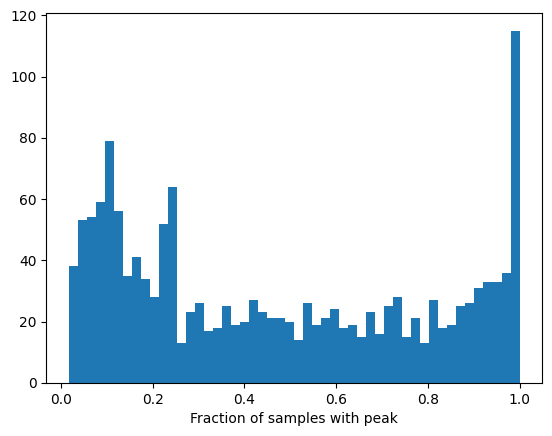

In [55]:
_ = plt.hist(freq, bins=50)
plt.xlabel('Fraction of samples with peak')

In [76]:
metadata = metadata.loc[combined_int.columns].copy()
metadata['Ref'] = metadata['Pool'].astype(int)
metadata['batch_id'] = metadata['Batch'].astype(int)


In [77]:
# Save the data to directory for normalization
combined_dir = f'{main_dir}/combined'
os.makedirs(combined_dir, exist_ok=True)
sample_info_dir = f'{combined_dir}/sample_info'
os.makedirs(sample_info_dir, exist_ok=True)
final_peaks_dir = f'{combined_dir}/final_peaks'
os.makedirs(final_peaks_dir, exist_ok=True)

combined_int.to_csv(f'{combined_dir}/final_peaks/intensity_max.csv')
combined_info.to_csv(f'{combined_dir}/final_peaks/peak_info.csv')
metadata.to_csv(f'{combined_dir}/sample_info/sample_info.csv')

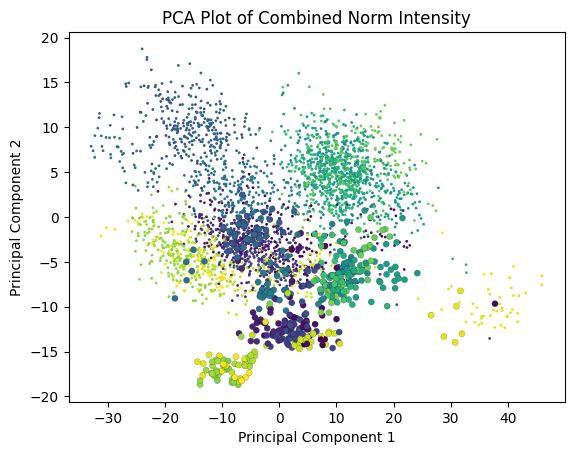

In [142]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Apply log2 transformation
combined_int_log2 = np.log2(combined_int).T
# combined_int_log2  = combined_int_log2.loc[metadata[metadata['Ref']==1].index.tolist()].copy()
combined_int_log2 = combined_int_log2[combined_info[combined_info['freq'] > 0.2].index.tolist()].copy()
# Apply standard scaler transformation
scaler = StandardScaler()
combined_int_scaled = scaler.fit_transform(combined_int_log2)
combined_int_scaled = pd.DataFrame(combined_int_scaled, index=combined_int_log2.index, columns=combined_int_log2.columns)

# Perform PCA
pca = PCA(n_components=2)
combined_int_scaled.fillna(0, inplace=True)
pca_result = pca.fit_transform(combined_int_scaled)
run_order = metadata.loc[combined_int_scaled.index,'run_order'].values
ref_samples = metadata.loc[combined_int_scaled.index,'Ref'].values
color_norm = plt.Normalize(vmin=0, vmax=metadata['run_order'].max())

# Create PCA plot
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=run_order, cmap='viridis', s=1, norm=color_norm)

plt.scatter(pca_result[:, 0][ref_samples.astype(bool)], 
            pca_result[:, 1][ref_samples.astype(bool)], 
            c=run_order[ref_samples.astype(bool)], cmap='viridis', 
            s=20, norm=color_norm, edgecolors='black', linewidths=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Combined Norm Intensity')
plt.show()

In [112]:
combined_int_scaled

,FT10040,FT10089,FT10091,FT10097,FT10098,FT10100,FT10101,FT10104,FT10152,FT10155,...,FT9903,FT9905,FT9911,FT9912,FT9913,FT9914,FT9916,FT9972,FT9975,FT9980
F076_200714_M331_001.mzML,-0.425560,0.196441,0.298817,-0.313002,0.000000,0.000000,-0.286787,-0.229870,0.000000,0.000000,...,0.000000,-1.589721,0.517231,-0.342378,0.940363,0.131475,-0.098525,0.154558,0.000000,1.128925
F076_200714_M331_009.mzML,0.000000,0.502127,0.570843,0.000000,0.000000,0.000000,0.731206,0.000000,0.731377,0.000000,...,0.000000,0.220710,0.375147,0.167340,0.408761,0.055264,0.318614,0.366664,1.293854,0.000000
F076_200714_M331_017.mzML,-0.461229,-1.405183,-1.010826,0.000000,0.000000,0.000000,-1.064595,-0.933646,0.680772,0.000000,...,0.000000,-0.208020,-0.166946,-1.070842,0.175700,0.481284,-1.154074,-0.341242,-0.124199,-0.448332
F076_200714_M331_025.mzML,0.075047,-0.790816,-0.874632,0.921943,0.000000,0.000000,-1.033475,0.000000,0.000000,0.000000,...,0.000000,-0.690423,0.767663,-0.737389,1.039025,1.145868,-0.820292,1.718987,-1.132444,0.828265
F076_200714_M331_033.mzML,0.000000,-0.246470,0.001948,-0.856847,0.000000,0.000000,-1.232663,-0.915053,-0.065499,0.000000,...,0.000000,0.870571,0.000000,0.000000,-0.795432,-1.374243,0.000000,1.206087,-0.208981,-1.971692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F076_201011_M331_249.mzML,-0.008494,0.781849,0.829695,0.000000,0.000000,0.000000,0.000000,-0.388852,0.820937,0.000000,...,1.170315,1.118704,1.583630,0.329803,1.425964,1.697365,0.510895,0.616196,0.499462,0.722540
F076_201011_M331_257.mzML,-0.032651,0.640850,0.647662,0.000000,0.102196,0.673959,0.466514,1.006404,0.629647,-0.524102,...,0.136313,0.585911,0.675055,0.259019,0.769027,0.727189,0.229600,0.158305,0.641510,-0.078889
F076_201011_M331_265.mzML,0.645077,1.928141,1.652746,2.049736,0.365380,1.930398,2.770532,2.136156,-0.268618,1.074730,...,1.353859,1.594289,1.341479,1.420533,1.187069,0.844648,1.442216,0.527400,1.310926,0.038510
F076_201011_M331_273.mzML,0.000000,1.510779,1.576410,1.945523,1.220386,2.328419,2.065476,2.552700,0.501335,0.554806,...,0.627599,1.861953,0.595411,1.582560,0.692353,0.195203,1.410530,0.037997,1.239494,0.000000


In [110]:
combined_int_log2.loc[metadata[metadata['Ref']==1].index.tolist()]

,FT10040,FT10089,FT10091,FT10097,FT10098,FT10100,FT10101,FT10104,FT10152,FT10155,...,FT9903,FT9905,FT9911,FT9912,FT9913,FT9914,FT9916,FT9972,FT9975,FT9980
F076_200714_M331_001.mzML,13.073417,15.971416,17.228631,12.918621,NaN,NaN,14.037202,15.652578,NaN,NaN,...,NaN,17.246497,16.021399,15.646439,17.678068,16.991122,14.506880,16.128663,NaN,15.780557
F076_200714_M331_009.mzML,NaN,16.254440,17.478554,NaN,NaN,NaN,15.038152,NaN,17.017348,NaN,...,NaN,19.631797,15.830993,16.187535,16.918904,16.882477,14.928477,16.381590,17.792607,NaN
F076_200714_M331_137.mzML,NaN,12.436998,13.358697,NaN,NaN,NaN,10.200357,16.084197,13.095491,NaN,...,NaN,18.084522,NaN,13.305427,NaN,NaN,12.125885,13.786100,12.579338,NaN
F076_200714_M331_265.mzML,12.984587,15.330674,16.667103,12.670083,NaN,NaN,14.330605,NaN,NaN,NaN,...,NaN,17.481252,16.215677,15.297417,17.386108,16.756655,14.091837,16.455542,15.224706,15.917240
F076_200714_M331_273.mzML,12.276521,17.041774,17.903956,12.857763,NaN,NaN,15.635596,16.577066,NaN,NaN,...,NaN,20.159327,15.196819,16.226838,16.247518,17.024242,15.000810,15.706595,17.485925,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F076_201011_M331_001.mzML,NaN,14.322375,15.321214,NaN,NaN,16.843248,13.741532,18.283764,15.792243,NaN,...,NaN,20.655251,NaN,NaN,17.129380,16.601409,14.376733,NaN,16.719298,17.553334
F076_201011_M331_009.mzML,14.810784,NaN,18.382701,15.205973,13.402011,17.946004,17.322202,19.344135,16.722610,12.680524,...,14.369315,22.488647,NaN,NaN,17.281940,17.228364,16.287662,NaN,18.415014,NaN
F076_201011_M331_137.mzML,15.086947,17.900794,18.785299,16.313953,13.968661,16.593259,17.238928,17.294278,17.227479,12.695382,...,NaN,21.600177,16.471806,18.075084,16.963107,16.797856,16.477748,15.083663,18.765529,NaN
F076_201011_M331_265.mzML,14.399823,17.574732,18.472551,15.228276,13.115764,17.444407,17.043336,18.317091,15.926871,13.288433,...,16.514297,21.441529,17.125960,17.517876,18.030381,18.007815,16.064087,16.573260,17.814282,14.654068


In [104]:
ref_samples

array([1, 1, 0, ..., 1, 1, 0])

In [72]:
# ! pip install ray
# ! pip install pymzml
# ! pip install trackpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 2.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached looseversion-1.3.0-py2.py3-none-any.whl.metadata (4.6 kB)
Using cached looseversion-1.3.0-py2.py3-none-any.whl (8.2 kB)
  Created wheel for trackpy: filename=trackpy-0.6.2-py3-none-any.whl size=130035 sha256=3d75135330077d504ab318df56defdf15bfccd4c3be7fa0a46a1ba683dbe5c86
  Stored in directory: /Users/jonaheaton/Library/Caches/pip/wheels/cf/01/3e/948bc1bee06de0fedadb10be017b5cbf61f89878fc4f0bbddc
Successfully built trackpy


In [78]:
# sys.path.append('/Users/jonaheaton/mzlearn/peak_picking_pipeline')
# from normalization_wrapper import normalization_script 
# easier to just run the normalization in a different terminal with the correct environment

In [79]:
combined_norm_int = pd.read_csv(f'{combined_dir}/final_peaks/intensity_max_pool.csv', index_col=0)

(3455, 173)


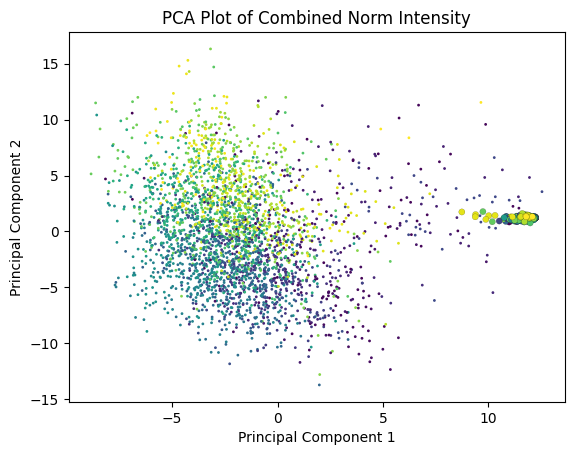

In [158]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Apply log2 transformation
combined_norm_int_log2 = np.log2(combined_norm_int).T
combined_norm_int_log2 = combined_norm_int_log2[combined_info[combined_info['freq'] > 0.95].index.tolist()].copy()
# Apply standard scaler transformation
scaler = StandardScaler()
combined_norm_int_scaled = scaler.fit_transform(combined_norm_int_log2)
combined_norm_int_scaled = pd.DataFrame(combined_norm_int_scaled, index=combined_norm_int_log2.index)

print(combined_norm_int_scaled.shape)
# Perform PCA
pca = PCA(n_components=2)
combined_norm_int_scaled.fillna(0, inplace=True)
pca_result = pca.fit_transform(combined_norm_int_scaled)

run_order = metadata.loc[combined_norm_int_scaled.index,'run_order'].values
ref_samples = metadata.loc[combined_norm_int_scaled.index,'Ref'].values
color_norm = plt.Normalize(vmin=0, vmax=metadata['run_order'].max())

# Create PCA plot
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=run_order, cmap='viridis', s=1, norm=color_norm)

plt.scatter(pca_result[:, 0][ref_samples.astype(bool)], 
            pca_result[:, 1][ref_samples.astype(bool)], 
            c=run_order[ref_samples.astype(bool)], cmap='viridis', 
            s=20, norm=color_norm, edgecolors='black', linewidths=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Combined Norm Intensity')
plt.show()

In [120]:
combined_norm_int

,F076_200714_M331_001.mzML,F076_200714_M331_009.mzML,F076_200714_M331_017.mzML,F076_200714_M331_025.mzML,F076_200714_M331_033.mzML,F076_200714_M331_041.mzML,F076_200714_M331_049.mzML,F076_200714_M331_057.mzML,F076_200714_M331_065.mzML,F076_200714_M331_073.mzML,...,F076_201011_M331_209.mzML,F076_201011_M331_217.mzML,F076_201011_M331_225.mzML,F076_201011_M331_233.mzML,F076_201011_M331_241.mzML,F076_201011_M331_249.mzML,F076_201011_M331_257.mzML,F076_201011_M331_265.mzML,F076_201011_M331_273.mzML,F076_201011_M331_281.mzML
FT10040,14941.562,NaN,11787.7930,16726.055,NaN,8010.011,10173.402,14102.483,6746.3450,NaN,...,3795.2415,3092.9617,4329.3354,7676.4480,5448.082,5902.2285,6469.2770,14941.562,NaN,NaN
FT10041,42115.580,3471.440,4959.5464,7887.721,5743.2837,6464.715,9258.850,9289.512,NaN,17430.416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT10068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT10089,95444.836,95444.836,20452.5490,28792.367,56541.4380,19264.451,30673.290,40674.957,17685.5490,30323.695,...,40049.3440,27835.9280,21277.1170,41143.0940,63106.516,38014.3480,37516.1560,95444.836,95444.836,NaN
FT10091,234721.600,229389.700,87425.1500,86333.055,202900.8600,112891.770,91865.016,116852.310,NaN,74337.195,...,106568.5000,68787.7600,82136.5400,94622.2600,206190.800,99149.3360,94807.0860,198889.900,247623.610,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT9914,95790.200,95790.200,169501.7000,290774.400,32019.7100,224171.830,942178.300,104008.450,190065.1900,711946.800,...,51834.3870,199757.9500,153986.3600,75307.7100,65818.240,170065.1200,68443.1300,95790.200,95790.200,NaN
FT9916,40932.880,40932.880,14050.0370,15618.584,NaN,17966.280,33984.110,40137.387,8672.5625,17928.371,...,8415.4590,17660.6520,18670.2130,12561.8790,10214.681,14213.7030,12889.7440,40932.880,40932.880,NaN
FT9972,56451.280,56451.280,36462.4500,175308.670,150154.9500,41028.723,185485.620,94401.340,64429.6300,112881.170,...,56485.9960,39669.1000,33073.5200,26273.0980,88469.040,49576.1370,35604.9340,56451.280,56451.280,NaN
FT9975,NaN,165785.200,54662.9920,20574.310,63192.1760,96971.664,NaN,NaN,NaN,15344.409,...,39545.0230,43593.0100,77548.1100,67056.7900,61482.850,57295.6370,73491.4300,165785.200,165785.200,NaN


In [121]:
metadata[metadata['Ref']==1]

,Sample ID,Factors.Subject_ID,Factors.LungCancer,Batch,Raw_files,AGE,Column Name,mzml_file,timestamp,npy_file,...,Group,QC,Pool,Age,Cancer,Sex,Region,Smoker,Ref,batch_id
F076_200714_M331_001.mzML,q3June2014_2a,PooledQAQC,-,2,F076_200714_M331_001,-,Hilic Positive,F076_200714_M331_001.mzML,2020-07-15 13:51:16,F076_200714_M331_001.npy,...,Odds Group 0,True,True,NaN,NaN,F,China,Never,1,2
F076_200714_M331_009.mzML,q3June2014_2b,PooledQAQC,-,2,F076_200714_M331_009,-,Hilic Positive,F076_200714_M331_009.mzML,2020-07-15 14:44:23,F076_200714_M331_009.npy,...,Odds Group 0,True,True,NaN,NaN,F,China,Never,1,2
F076_200714_M331_137.mzML,q3June2014_2c,PooledQAQC,-,2,F076_200714_M331_137,-,Hilic Positive,F076_200714_M331_137.mzML,2020-07-16 04:53:20,F076_200714_M331_137.npy,...,Odds Group 0,True,True,NaN,NaN,F,China,Never,1,2
F076_200714_M331_265.mzML,q3June2014_2e,PooledQAQC,-,2,F076_200714_M331_265,-,Hilic Positive,F076_200714_M331_265.mzML,2020-07-16 19:02:06,F076_200714_M331_265.npy,...,Odds Group 0,True,True,NaN,NaN,F,China,Never,1,2
F076_200714_M331_273.mzML,q3June2014_2f,PooledQAQC,-,2,F076_200714_M331_273,-,Hilic Positive,F076_200714_M331_273.mzML,2020-07-16 19:55:11,F076_200714_M331_273.npy,...,Odds Group 0,True,True,NaN,NaN,F,China,Never,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F076_201011_M331_001.mzML,q3June2014_25a,PooledQAQC,-,25,F076_201011_M331_001,-,Hilic Positive,F076_201011_M331_001.mzML,2020-10-24 12:39:39,F076_201011_M331_001.npy,...,Odds Group 3,True,True,NaN,NaN,F,China,Never,1,25
F076_201011_M331_009.mzML,q3June2014_25b,PooledQAQC,-,25,F076_201011_M331_009,-,Hilic Positive,F076_201011_M331_009.mzML,2020-10-24 13:45:14,F076_201011_M331_009.npy,...,Odds Group 3,True,True,NaN,NaN,F,China,Never,1,25
F076_201011_M331_137.mzML,q3June2014_25c,PooledQAQC,-,25,F076_201011_M331_137,-,Hilic Positive,F076_201011_M331_137.mzML,2020-10-25 07:12:51,F076_201011_M331_137.npy,...,Odds Group 3,True,True,NaN,NaN,F,China,Never,1,25
F076_201011_M331_265.mzML,q3June2014_25e,PooledQAQC,-,25,F076_201011_M331_265,-,Hilic Positive,F076_201011_M331_265.mzML,2020-10-26 00:40:20,F076_201011_M331_265.npy,...,Odds Group 3,True,True,NaN,NaN,F,China,Never,1,25


In [119]:
combined_norm_int_log2.loc[metadata[metadata['Ref']==1].index.tolist()]

,FT10040,FT10089,FT10091,FT10097,FT10098,FT10100,FT10101,FT10104,FT10152,FT10155,...,FT9903,FT9905,FT9911,FT9912,FT9913,FT9914,FT9916,FT9972,FT9975,FT9980
F076_200714_M331_001.mzML,13.867043,16.54238,17.840591,14.032742,NaN,NaN,14.877895,15.549534,NaN,NaN,...,NaN,18.958278,15.533695,16.807734,16.776907,16.54759,15.320973,15.784719,NaN,15.333527
F076_200714_M331_009.mzML,NaN,16.54238,17.807441,NaN,NaN,NaN,15.355971,NaN,15.843162,NaN,...,NaN,18.958278,15.533695,16.807734,16.776907,16.54759,15.320973,15.784719,17.338956,NaN
F076_200714_M331_137.mzML,NaN,16.54238,17.505010,NaN,NaN,NaN,14.347450,19.515547,16.231789,NaN,...,NaN,18.958278,NaN,16.807734,NaN,NaN,15.320973,15.784719,17.338956,NaN
F076_200714_M331_265.mzML,13.867043,16.54238,17.919681,14.157269,NaN,NaN,15.260717,NaN,NaN,NaN,...,NaN,18.958278,15.533695,16.807734,16.776907,16.54759,15.320973,15.784719,17.338956,17.927425
F076_200714_M331_273.mzML,13.867043,16.54238,17.445947,13.806354,NaN,NaN,17.270932,15.403662,NaN,NaN,...,NaN,18.958278,15.533695,16.807734,16.776907,16.54759,15.320973,15.784719,17.338956,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F076_201011_M331_001.mzML,NaN,16.54238,17.702476,NaN,NaN,18.622200,15.522976,19.285719,17.112918,NaN,...,NaN,18.958278,NaN,NaN,16.776907,16.54759,15.320973,NaN,17.338956,17.202673
F076_201011_M331_009.mzML,13.867043,NaN,17.592245,13.833055,12.371556,16.476180,15.955337,17.125522,15.747262,11.709067,...,13.175226,18.958278,NaN,NaN,16.776907,16.54759,15.320973,NaN,17.338956,NaN
F076_201011_M331_137.mzML,13.867043,16.54238,17.588223,14.593522,12.661986,14.793851,15.595768,14.717872,16.008723,11.381110,...,NaN,18.958278,15.533695,16.807734,16.776907,16.54759,15.320973,15.784719,17.338956,NaN
F076_201011_M331_265.mzML,13.867043,16.54238,17.601610,14.008976,12.496151,15.971076,16.086895,16.066771,15.627294,12.580235,...,16.009990,18.958278,15.533695,16.807734,16.776907,16.54759,15.320973,15.784719,17.338956,13.208349


## Do some predictions with logistic regression

In [162]:
data_dir = os.path.join(main_dir, 'data_v1')
y_train = pd.read_csv(os.path.join(data_dir, 'y_shanghai_train.csv'), index_col=0)
y_val = pd.read_csv(os.path.join(data_dir, 'y_shanghai_val.csv'), index_col=0)
y_disc = pd.read_csv(os.path.join(data_dir, 'y_shanghai_discovery.csv'), index_col=0)
y_test = pd.read_csv(os.path.join(data_dir, 'y_shanghai_test.csv'), index_col=0)

In [163]:
X_train = combined_norm_int_scaled.loc[y_train.index].copy()
X_val = combined_norm_int_scaled.loc[y_val.index].copy()
X_disc = combined_norm_int_scaled.loc[y_disc.index].copy()
X_test = combined_norm_int_scaled.loc[y_test.index].copy()

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


# Initialize and train the logistic regression model
model = LogisticRegression(C=0.001, max_iter=1000)
model.fit(X_train, y_train['Cancer'])

# Predict probabilities for the validation data
y_pred_proba = model.predict_proba(X_val)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_val['Cancer'], y_pred_proba)

print("AUC Score:", auc_score)

AUC Score: 0.4534749034749035


In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


# Initialize and train the logistic regression model
model = LogisticRegression(C=0.001, max_iter=1000)
model.fit(X_disc, y_disc['Cancer'])

# Predict probabilities for the validation data
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test['Cancer'], y_pred_proba)

print("AUC Score:", auc_score)

AUC Score: 0.47324874193448796


In [161]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,169,170,171,172
F076_200713_M331_019.mzML,-0.725754,-1.662254,-1.927581,-0.254759,-0.366365,0.000462,-0.136930,-0.550824,-1.247281,0.154324,...,0.836288,0.862881,-1.216269,0.610564,-0.147208,0.498335,-0.028943,-1.192167,-1.147794,-1.066936
F076_200713_M331_021.mzML,-0.037853,-0.781769,-1.107142,1.192983,0.997217,0.886182,1.032100,0.199996,-0.095914,-0.311068,...,1.386464,1.249762,-0.659551,-0.035940,-0.116171,0.585200,1.944965,-0.479459,-0.494675,-0.410606
F076_200713_M331_023.mzML,-0.055476,-0.842220,-0.959400,1.376137,1.055602,1.069040,1.045852,-0.116576,-0.236621,0.063683,...,0.930778,0.888588,-0.997844,-0.084591,0.061964,0.251340,0.605406,-0.373166,-0.580118,-0.644248
F076_200713_M331_037.mzML,0.952052,-0.849978,-1.042943,0.359586,0.357639,0.148051,0.124642,-0.208621,-0.302180,0.266887,...,3.183850,3.162968,2.169429,1.454565,0.732564,0.643274,0.349074,0.675454,0.750623,0.728304
F076_200713_M331_039.mzML,0.684219,-0.887181,-0.677725,0.682387,0.351459,0.391714,0.493265,0.089172,0.035247,0.305281,...,3.227618,3.125208,1.641367,0.280109,0.022070,-0.301724,0.280314,1.209065,1.025838,1.048961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F076_201011_M331_243.mzML,0.529214,0.259748,0.169608,0.210802,0.201380,0.002123,-0.044188,-1.605942,-1.534748,-0.556819,...,1.496761,1.532855,-0.668962,-0.840164,-1.826750,-0.694477,-0.021523,-1.661325,-1.681523,-1.718563
F076_201011_M331_245.mzML,0.537029,0.577728,0.506415,0.798461,0.662142,0.526660,0.558083,-0.606286,-0.713322,-0.585711,...,1.505694,1.572951,-0.494415,-0.425889,-1.495811,-0.255573,0.362508,-1.092391,-0.995015,-1.205142
F076_201011_M331_253.mzML,-0.071500,-0.068318,0.253897,-0.007382,0.160027,0.340733,0.328280,-1.843170,-1.877803,-0.419266,...,-0.149870,-0.070774,-1.448486,0.317201,-0.496255,-0.033776,-0.441561,-2.192109,-2.381587,-2.391361
F076_201011_M331_255.mzML,-0.031383,-0.022542,0.291184,0.006627,0.119399,0.362001,0.306053,-1.946792,-1.801139,-0.658052,...,-0.327075,-0.284587,0.000000,-0.100667,-0.991723,-0.091070,-0.200370,-2.332731,-2.270672,-2.277513


In [149]:
X_val

,0,1,2,3,4,5,6,7,8,9,...,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066
F076_200713_M331_109.mzML,0.000000,-0.744396,-1.270565,0.000000,0.000000,0.000000,-1.476091,0.116894,-1.202248,1.045385,...,0.000000,0.652867,-1.119230,-0.459623,-0.719357,-0.217607,-0.547542,0.013456,-1.832355,-0.174282
F076_200713_M331_111.mzML,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.465285,-0.709960,0.000000,...,-1.229067,0.931606,0.000000,-0.356207,-0.657651,-0.315468,0.000000,-0.116209,-1.523549,-0.074004
F076_200713_M331_113.mzML,0.000000,0.000000,0.000000,0.000000,0.000000,1.436130,0.000000,1.490973,0.000000,0.000000,...,0.000000,1.498990,-1.032042,0.000000,0.042363,0.856872,-1.021252,0.270235,0.000000,0.000000
F076_200713_M331_193.mzML,0.000000,0.406208,0.000000,0.000000,0.000000,0.001484,0.000000,0.634493,-0.074343,0.000000,...,0.000000,1.664630,-0.201903,-1.209389,-0.458238,0.990254,-1.073180,-0.721898,0.471607,0.091899
F076_200713_M331_195.mzML,-0.310010,0.014537,-0.549417,0.000645,0.000000,-0.169233,0.120472,0.738845,-0.750127,-0.644854,...,-1.462731,1.896896,0.000000,-1.143572,-0.265731,0.941198,-0.675745,-1.423961,-1.044749,-1.173340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F076_201011_M331_237.mzML,2.089035,0.000000,0.000000,0.000000,1.638381,-1.710938,0.000000,-2.182133,-0.264797,0.000000,...,1.342170,-1.686153,0.278279,-0.805271,0.677959,0.080814,-0.923504,-0.872216,-0.826617,-0.877742
F076_201011_M331_239.mzML,2.145599,-0.414799,0.000000,-0.980865,1.535406,-1.318754,0.000000,-1.652175,-0.183242,0.000000,...,0.000000,-1.576074,0.191951,-0.782771,0.596356,-0.047599,-0.902532,-1.154091,-0.849131,-1.219123
F076_201011_M331_247.mzML,-0.944141,-0.582550,0.000000,-1.929843,-0.943677,0.000000,0.000000,0.000000,0.197356,-0.426765,...,0.000000,-1.474589,0.024033,-0.624420,0.816612,0.657904,-0.997415,0.562675,0.157005,-1.192039
F076_201011_M331_249.mzML,-0.956191,-0.807404,-0.554290,0.000000,0.000000,0.000000,0.000000,-2.715610,0.184430,0.000000,...,1.130287,-1.538918,0.766755,-1.010186,0.889211,0.750216,-0.928840,-0.331710,-0.252410,-1.025872


In [145]:
y_train

,Cancer,Age,Group,Batch,Sample ID
F076_200713_M331_019.mzML,1.0,68.0,Odds Group 3,1,SWHS0039
F076_200713_M331_021.mzML,1.0,68.0,Odds Group 0,1,SWHS0039
F076_200713_M331_023.mzML,1.0,68.0,Odds Group 1,1,SWHS0039
F076_200713_M331_037.mzML,1.0,48.0,Odds Group 0,1,SWHS0687
F076_200713_M331_039.mzML,1.0,48.0,Odds Group 1,1,SWHS0687
...,...,...,...,...,...
F076_201011_M331_243.mzML,1.0,46.0,Odds Group 0,25,SWHS0070
F076_201011_M331_245.mzML,1.0,46.0,Odds Group 1,25,SWHS0070
F076_201011_M331_253.mzML,1.0,65.0,Odds Group 1,25,SWHS0646
F076_201011_M331_255.mzML,1.0,65.0,Odds Group 2,25,SWHS0646


In [143]:
combined_norm_int_scaled

,0,1,2,3,4,5,6,7,8,9,...,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066
F076_200714_M331_001.mzML,0.214746,0.932288,1.107752,0.940160,0.000000,0.000000,0.582915,-0.397065,0.000000,0.000000,...,0.000000,-0.338231,0.569183,0.810908,0.641793,-0.158643,0.709411,-0.105141,0.000000,0.767432
F076_200714_M331_009.mzML,0.000000,0.932288,1.063436,0.000000,0.000000,0.000000,1.098023,0.000000,-0.242744,0.000000,...,0.000000,-0.338231,0.569183,0.810908,0.641793,-0.158643,0.709411,-0.105141,1.387797,0.000000
F076_200714_M331_017.mzML,-0.084138,-1.978789,-0.796997,0.000000,0.000000,0.000000,-0.494995,-1.637857,-0.567734,0.000000,...,0.000000,-1.115145,-0.917894,-0.977810,0.282498,0.744961,-0.946778,-0.867701,-0.325026,-0.670563
F076_200714_M331_025.mzML,0.356977,-1.332483,-0.821240,1.940722,0.000000,0.000000,-0.633042,0.000000,0.000000,0.000000,...,0.000000,-2.003326,0.508054,-0.763283,1.545497,1.599455,-0.782854,1.871799,-1.833511,0.439498
F076_200714_M331_033.mzML,0.000000,-0.057147,0.826784,0.506196,0.000000,0.000000,-0.388809,-1.293907,-1.182298,0.000000,...,0.000000,0.283672,0.000000,0.000000,-0.910193,-1.893659,0.000000,1.601593,-0.101189,-1.843896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F076_201011_M331_249.mzML,-0.956191,-0.807404,-0.554290,0.000000,0.000000,0.000000,0.000000,-2.715610,0.184430,0.000000,...,1.130287,-1.538918,0.766755,-1.010186,0.889211,0.750216,-0.928840,-0.331710,-0.252410,-1.025872
F076_201011_M331_257.mzML,-0.840544,-0.832334,-0.640660,0.000000,-0.590906,-0.847143,-0.951649,-1.210132,0.129148,-1.677918,...,0.095433,-2.087794,-0.689119,-0.939091,-0.112595,-0.690888,-1.080278,-0.909221,0.131902,-1.631859
F076_201011_M331_265.mzML,0.214746,0.932288,0.788277,0.914380,-0.029642,0.400670,1.885565,0.066366,-0.487047,0.306391,...,1.516468,-0.338231,0.569183,0.810908,0.641793,-0.158643,0.709411,-0.105141,1.387797,-1.216372
F076_201011_M331_273.mzML,0.000000,0.932288,1.210953,0.960412,0.700906,1.075322,1.021929,0.832890,0.366902,0.061342,...,1.439143,-0.338231,0.569183,0.810908,0.641793,-0.158643,0.709411,-0.105141,1.387797,0.000000
